<a href="https://colab.research.google.com/github/tiaherdi/Traffic-Sign-5/blob/main/Group_Traffic_Sign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library

import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# Read file from dataset via GitHub 
dataset = pd.read_csv('https://raw.githubusercontent.com/tiaherdi/Traffic-Sign-5/main/covid_impact_on_airport_traffic.csv?token=GHSAT0AAAAAABXA5PPBYWDAZHNZUSTZONLMYXBK4VQ',index_col='Date',parse_dates=['Date'])
dataset.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-04-03,Daily,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-04-13,Daily,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-07-10,Daily,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-09-02,Daily,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-10-31,Daily,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


# a. Exploratory Data Analysis (EDA)

In [4]:
# Data distribution based on country
data_per_negara = dataset.groupby("Country").count()
data_per_negara

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Geography
Country,,,,,,,,,
Australia,257,257,257,257,257,257,257,257,257
Canada,2311,2311,2311,2311,2311,2311,2311,2311,2311
Chile,238,238,238,238,238,238,238,238,238
United States of America (the),4441,4441,4441,4441,4441,4441,4441,4441,4441


In [5]:
# Five earliest data sort by Date
data = dataset.sort_values(by="Date")
data.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-03-16,Daily,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
2020-03-16,Daily,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
2020-03-16,Daily,1.0,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
2020-03-16,Daily,1.0,Los Angeles International,98,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
2020-03-16,Daily,1.0,McCarran International,68,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -..."


In [6]:
# Five latest data after sorted by Date
data.tail()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-12-02,Daily,1.0,Los Angeles International,81,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
2020-12-02,Daily,1.0,Boston Logan International,66,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."
2020-12-02,Daily,1.0,Calgary International,99,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -..."
2020-12-02,Daily,1.0,Winnipeg International,100,POINT(-97.2190621861971 49.9024712565967),Winnipeg,Manitoba,CA-MB,Canada,"POLYGON((-97.2094345092773 49.8979517850609, -..."
2020-12-02,Daily,1.0,Montreal Mirabel,100,POINT(-74.048379779338 45.6815027038316),Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -..."


In [7]:
# Describing descriptive statistic on Percent of Baseline
data.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [ ]:
# Feature selection -> get data needed
data = dataset.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Geography', 'Centroid', 'State', 'City'], 
                         axis=1)
data = data.sort_values(by="Date")
data.head()

,AirportName,PercentOfBaseline,Country
Date,,,
2020-03-16,Santiago International Airport,96,Chile
2020-03-16,Halifax International,72,Canada
2020-03-16,Hartsfield-Jackson Atlanta International,92,United States of America (the)
2020-03-16,Los Angeles International,98,United States of America (the)
2020-03-16,McCarran International,68,United States of America (the)


In [8]:
# Creating DataFrame based on country
data_per_negara = data.groupby('Country')
australia = data_per_negara.get_group('Australia')
canada = data_per_negara.get_group('Canada')
chile = data_per_negara.get_group('Chile')
us  = data_per_negara.get_group('United States of America (the)')

Visualization Percent of Baseline based on country and date

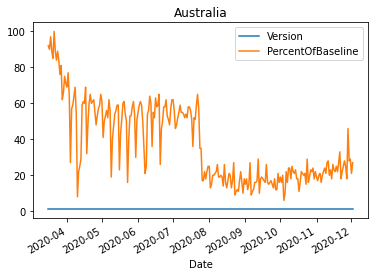

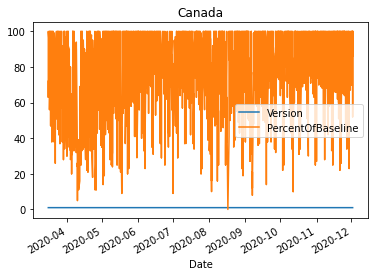

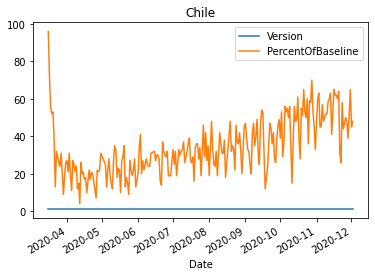

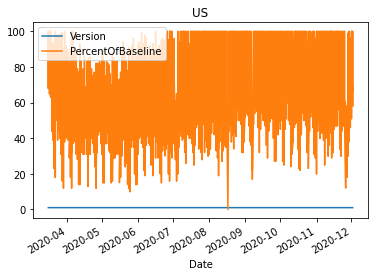

In [9]:
# Visualization by country
australia.plot(title='Australia')
canada.plot(title='Canada')
chile.plot(title='Chile')
us.plot(title='US')

# b. Time-Series Analysis

In [10]:
# Percent of Baseline per-country
baseline_au = australia.PercentOfBaseline.sort_index()
baseline_ca = canada.PercentOfBaseline.sort_index()
baseline_cl = chile.PercentOfBaseline.sort_index()
baseline_us = us.PercentOfBaseline.sort_index()

In [11]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_au = baseline_au[start:end]
print('Sample of Time Series Data (Australia):')
baseline_au.head()

Sample of Time Series Data (Australia):


Date
2020-03-16    92
2020-03-17    90
2020-03-18    97
2020-03-19    89
2020-03-20    85
Name: PercentOfBaseline, dtype: int64

In [12]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_ca = baseline_ca[start:end]
print('Sample of Time Series Data (Canada):')
baseline_ca.head()

Sample of Time Series Data (Canada):


Date
2020-03-16     72
2020-03-16     63
2020-03-16    100
2020-03-16    100
2020-03-16    100
Name: PercentOfBaseline, dtype: int64

In [13]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_cl = baseline_cl[start:end]
print('Sample of Time Series Data (Chile):')
baseline_cl.head()

Sample of Time Series Data (Chile):


Date
2020-03-16    96
2020-03-17    72
2020-03-18    56
2020-03-19    52
2020-03-20    53
Name: PercentOfBaseline, dtype: int64

In [14]:
start = pd.to_datetime('2020-03-16')
end = pd.to_datetime('2020-12-02')
baseline_us = baseline_us[start:end]
print('Sample of Time Series Data (US):')
baseline_us.head()

Sample of Time Series Data (US):


Date
2020-03-16    92
2020-03-16    98
2020-03-16    68
2020-03-16    91
2020-03-16    94
Name: PercentOfBaseline, dtype: int64

# c. Replacing Missing Data with Estimated Value

In [15]:
# Australia
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_au.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_au[date-td] # Take earlier value
  baseline_au[date] = prev_val # Throw earlier value

baseline_au.sort_index(inplace=True)
# Set time index frequency as daily
baseline_au.freq="D"

In [16]:
# Canada
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_ca.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_ca[date-td] # Take earlier value
  baseline_ca[date] = prev_val # Throw earlier value

baseline_ca.sort_index(inplace=True)
# Set time index frequency as daily
baseline_ca.freq="D"

In [17]:
# Chile
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_cl.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_cl[date-td] # Take earlier value
  baseline_cl[date] = prev_val # Throw earlier value

baseline_cl.sort_index(inplace=True)
# Set time index frequency as daily
baseline_cl.freq="D"

In [18]:
# US
range = pd.date_range(start='2020-03-16', end='2020-12-02', freq='D')
ts = baseline_us.index
diff_dates = range.difference(ts)

td = pd.Timedelta(1, 'd') # 1 day
for date in diff_dates:
  prev_val = baseline_us[date-td] # Take earlier value
  baseline_us[date] = prev_val # Throw earlier value

baseline_us.sort_index(inplace=True)
# Set time index frequency as daily
baseline_us.freq="D"

# d. Split Data for Training and **Testing**

**Australia**

In [26]:
# We use 90% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.9 * len(baseline_au))

train_au = baseline_au[:split_time]
test_au = baseline_au[split_time:]

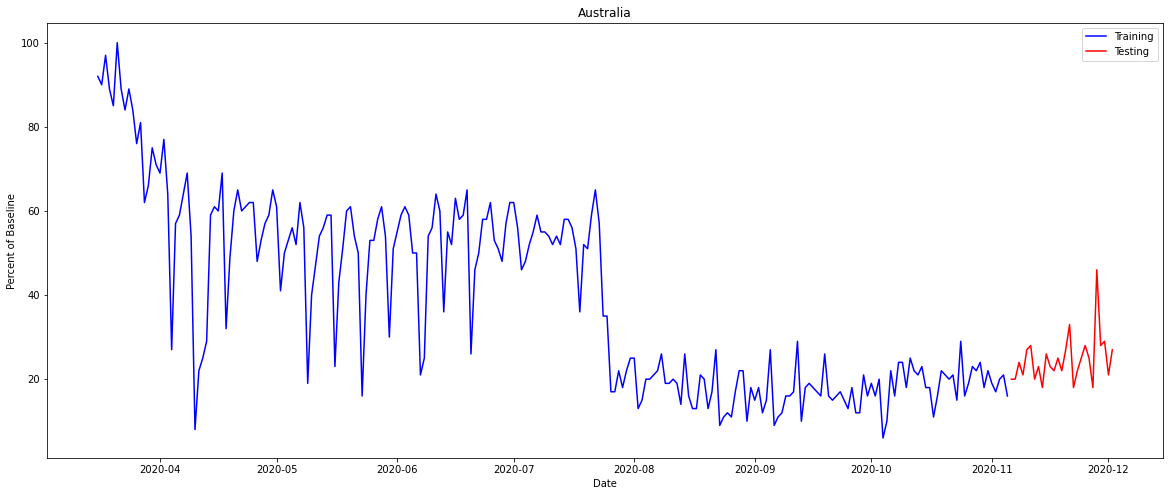

In [27]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_au, color='blue', label='Training')
plt.plot(test_au, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Australia')
plt.legend()
plt.show()

**Canada**

In [28]:
# We use 90% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.9 * len(baseline_ca))

train_ca = baseline_ca[:split_time]
test_ca= baseline_ca[split_time:]

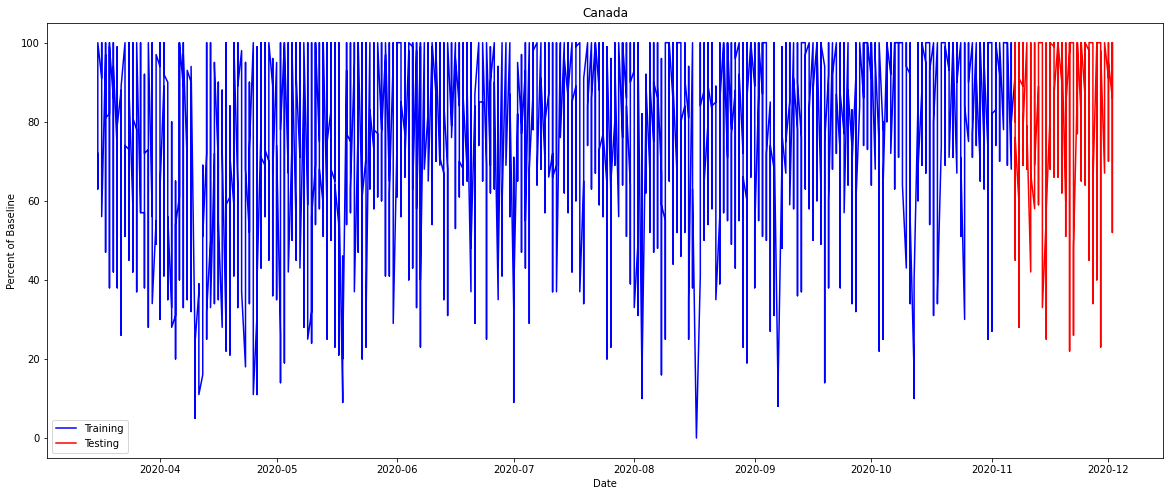

In [29]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_ca, color='blue', label='Training')
plt.plot(test_ca, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Canada')
plt.legend()
plt.show()

**Chile**

In [34]:
# We use 90% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.9 * len(baseline_cl))

train_cl = baseline_cl[:split_time]
test_cl = baseline_cl[split_time:]

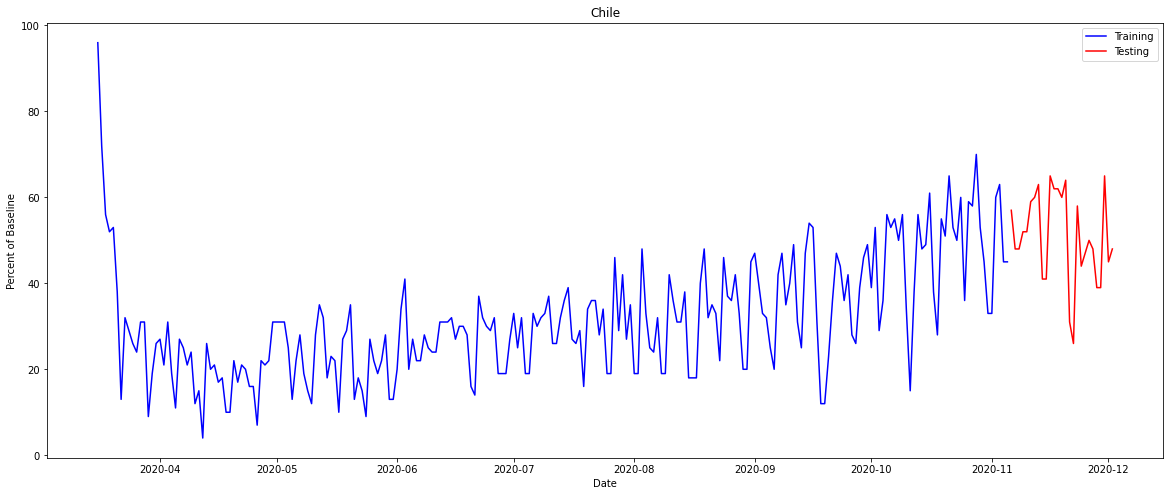

In [31]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_cl, color='blue', label='Training')
plt.plot(test_cl, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Chile')
plt.legend()
plt.show()

**US**

In [33]:
# We use 90% of data Percent of Baseline for train data, 20% for test data
split_time = int(0.9 * len(baseline_us))

train_us = baseline_us[:split_time]
test_us = baseline_us[split_time:]

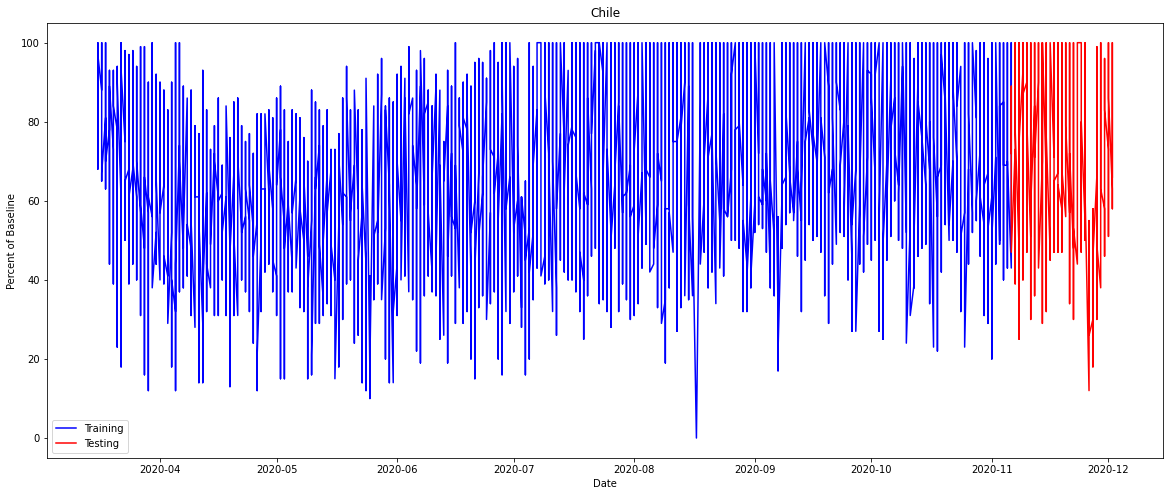

In [35]:
# Display a plot of train and test split
fig = plt.figure(figsize=(20,8))
plt.plot(train_us, color='blue', label='Training')
plt.plot(test_us, color='red', label='Testing')
plt.xlabel('Date')
plt.ylabel('Percent of Baseline')
plt.title('Chile')
plt.legend()
plt.show()

# e. Window Dataset

In [36]:
# Australia
# Creates a windowed dataset
WINDOW = 15 

train_data_au = tf.data.Dataset.from_tensor_slices(train_au.values) # convert to TensorSliceDataset
train_data_au = train_data_au.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_au = train_data_au.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_au = train_data_au.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_au = train_data_au.shuffle(1_000) # shuffles dataset Australia

train_data_au = train_data_au.batch(32).prefetch(1) # creates batches of windows

In [37]:
# Canada
# Creates a windowed dataset
WINDOW = 15 

train_data_ca = tf.data.Dataset.from_tensor_slices(train_ca.values) # convert to TensorSliceDataset
train_data_ca = train_data_ca.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_ca = train_data_ca.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_ca = train_data_ca.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_ca = train_data_ca.shuffle(1_000) # shuffles dataset Canada

train_data_ca = train_data_ca.batch(32).prefetch(1) # creates batches of windows

In [38]:
# Chile
# Creates a windowed dataset
WINDOW = 15 

train_data_cl = tf.data.Dataset.from_tensor_slices(train_cl.values) # convert to TensorSliceDataset
train_data_cl = train_data_cl.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_cl = train_data_cl.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_cl = train_data_cl.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_cl = train_data_cl.shuffle(1_000) # shuffles dataset Chile

train_data_cl = train_data_cl.batch(32).prefetch(1) # creates batches of windows

In [ ]:
# US
# Creates a windowed dataset
WINDOW = 15 

train_data_us = tf.data.Dataset.from_tensor_slices(train_us.values) # convert to TensorSliceDataset
train_data_us = train_data_us.window(WINDOW+1, shift=1, drop_remainder=True) # takes window size+1
train_data_us = train_data_us.flat_map(lambda x: x.batch(WINDOW+1)) # flattens windowed data
train_data_us = train_data_us.map(lambda x: (x[:-1], x[-1])) # creates features and target tuple

train_data_us = train_data_us.shuffle(1_000) # shuffles dataset US

train_data_us = train_data_us.batch(32).prefetch(1) # creates batches of windows

# f. Callback

In [39]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 10.0:
            print("MAE under 10.0... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

In [40]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

# g. Build the Model

**Australia**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [42]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 15, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            256       
                                                                 
 bidirectional (Bidirectiona  (None, 15, 256)          197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               1

In [43]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_au,
    epochs=30,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

MAE under 10.0... Stopping training


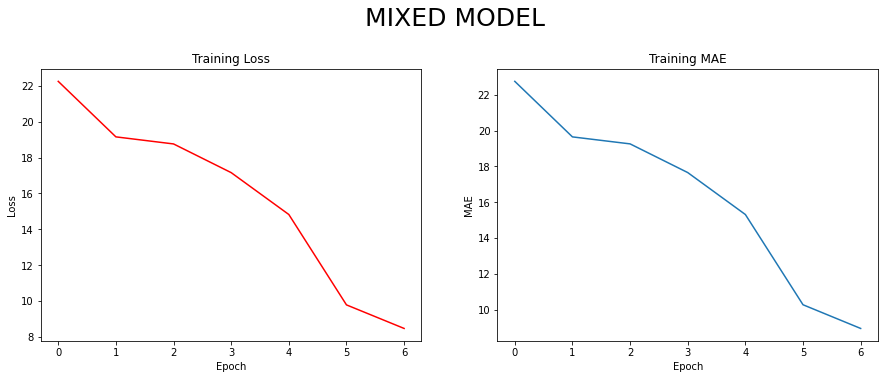

					FINAL LOSS: 8.47 | FINAL MAE: 8.95


In [44]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**Canada**

In [45]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [46]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 15, 1)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            256       
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 256)          197632    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_ca,
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

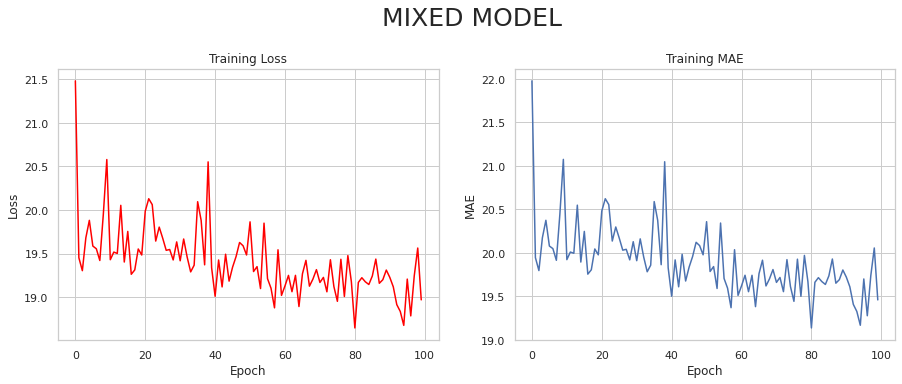

					FINAL LOSS: 18.97 | FINAL MAE: 19.46


In [ ]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**Chile**

In [ ]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 15, 1)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 15, 64)            256       
                                                                 
 bidirectional_14 (Bidirecti  (None, 15, 256)          197632    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 512)              

In [ ]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_cl,
    epochs=30,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

MAE under 10.0... Stopping training


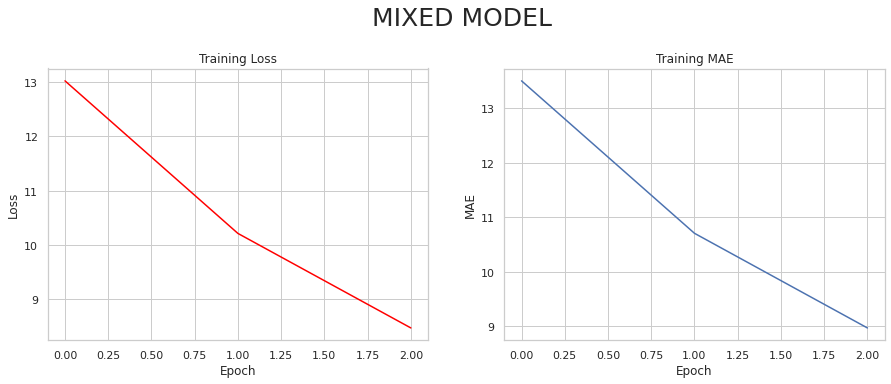

					FINAL LOSS: 8.48 | FINAL MAE: 8.96


In [ ]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


**US**

In [ ]:
mixed_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[WINDOW]), Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

In [ ]:
mixed_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

mixed_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 15, 1)             0         
                                                                 
 conv1d_8 (Conv1D)           (None, 15, 64)            256       
                                                                 
 bidirectional_16 (Bidirecti  (None, 15, 256)          197632    
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 512)              

In [ ]:
#Trains Mixed Model
mixed_history = mixed_model.fit(
    train_data_us,
    epochs=100,
    callbacks=[lr_scheduler, my_callback],
    verbose=0
)

In [ ]:
# Plots training history
# Plots history of model training
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(mixed_history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(mixed_history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'MIXED MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(mixed_history.history['loss'][-1], 2),
                                                 round(mixed_history.history['mae'][-1], 2)))


# h. Forecast Data

**Australia**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_au = train_au[-WINDOW:].append(test_au[:-1]).values

In [ ]:
model_forecasts_au = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_au = tf.data.Dataset.from_tensor_slices(forecast_data_au) 
    #takes window size  slices of the dataset
test_data_au = test_data_au.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_au = test_data_au.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_au = test_data_au.batch(32).prefetch(1)
    #gets model prediction 
preds_au = mixed_model.predict(test_data_au)
    #append to forecast dict
model_forecasts_au['MIXED MODEL'].append(preds_au)

In [ ]:
N = test_au.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_au['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

NameError: ignored

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_au.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_au['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**Canada**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_ca = train_ca[-WINDOW:].append(test_ca[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_ca = tf.data.Dataset.from_tensor_slices(forecast_data_ca) 
    #takes window size  slices of the dataset
test_data_ca = test_data_ca.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_ca = test_data_ca.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_ca = test_data_ca.batch(32).prefetch(1)
    #gets model prediction 
preds_ca = mixed_model.predict(test_data_ca)
    #append to forecast dict
model_forecasts_ca['MIXED MODEL'].append(preds_ca)

In [ ]:
N = test_ca.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_ca['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_ca.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_ca['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**Chile**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_cl = train_cl[-WINDOW:].append(test_cl[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_cl = tf.data.Dataset.from_tensor_slices(forecast_data_cl) 
    #takes window size  slices of the dataset
test_data_cl = test_data_cl.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_cl = test_data_cl.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_cl = test_data_cl.batch(32).prefetch(1)
    #gets model prediction 
preds_cl = mixed_model.predict(test_data_cl)
    #append to forecast dict
model_forecasts_cl['MIXED MODEL'].append(preds_cl)

In [ ]:
N = test_cl.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_cl['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_cl.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_cl['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()

**US**

In [ ]:
# Chunck of data to be windowed so that each window associated to a value in test set
forecast_data_us = train_us[-WINDOW:].append(test_us[:-1]).values

In [ ]:
model_forecasts_ca = {'MIXED MODEL': []}

#converts values to TensorSliceDataset
test_data_us = tf.data.Dataset.from_tensor_slices(forecast_data_us) 
    #takes window size  slices of the dataset
test_data_us = test_data_us.window(WINDOW, shift=1, drop_remainder=True)
    #flattens windowed data by batching 
test_data_us = test_data_us.flat_map(lambda x: x.batch(WINDOW+1))
    #creates batches of windows
test_data_us = test_data_us.batch(32).prefetch(1)
    #gets model prediction 
preds_us = mixed_model.predict(test_data_us)
    #append to forecast dict
model_forecasts_us['MIXED MODEL'].append(preds_us)

In [ ]:
N = test_ca.values.shape[0] #number of samples in test set
mix_mae = np.abs(test_au.values - model_forecasts_ca['MIXED MODEL'][0].squeeze()).sum() / N
print('MIXED MAE:', round(mix_mae, 2))

In [ ]:
#displays forecasted data
plt.rcParams["figure.figsize"] = (15,20)
fig, axs = plt.subplots(4, 1)

#Mixed Model Forecast
axs[2].plot(test_ca.values, color='black', linestyle='--', label='Actual Value')
axs[2].plot(model_forecasts_ca['MIXED MODEL'][0].squeeze(), color='red', label='Mixed')
axs[2].set_title('MIXED MODEL FORECAST')
axs[2].legend()